# 9. MapReduce Parallel Strategy

我们在教程 `04. Explain the Otimizer in Detail` 就讨论过 UltraOpt 优化器的运行机制以及通过**MapReduce**计算策略实现并行计算的原理。故本教程不详细阐述UltraOpt的`MapReduce`并行策略具体原理，只讨论如何**通过合理的配置在不同的计算环境下实现 MapReduce**。

UltraOpt实现MapReduce的本质是让优化器推荐多个配置，然后让不同的计算结点并行地对这些配置进行评价(`Map`)，然后等待所有计算结点完成计算并收集结果(`Reduce`)，用这个结果对优化器进行更新。

UltraOpt使用`joblib.Parallel`实现并行计算

In [1]:
from joblib import parallel_backend

In [2]:
from ultraopt import fmin
from ultraopt.tests.automl import evaluator, config_space

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import pylab as plt

In [3]:
n_jobs = 4

## 单机threading后端

In [7]:
with parallel_backend("threading"):
    result = fmin(evaluator, config_space, n_jobs=n_jobs, parallel_strategy="MapReduce", n_iterations=40)

100%|██████████| 40/40 [00:08<00:00,  4.95trial/s, best loss: 0.012]


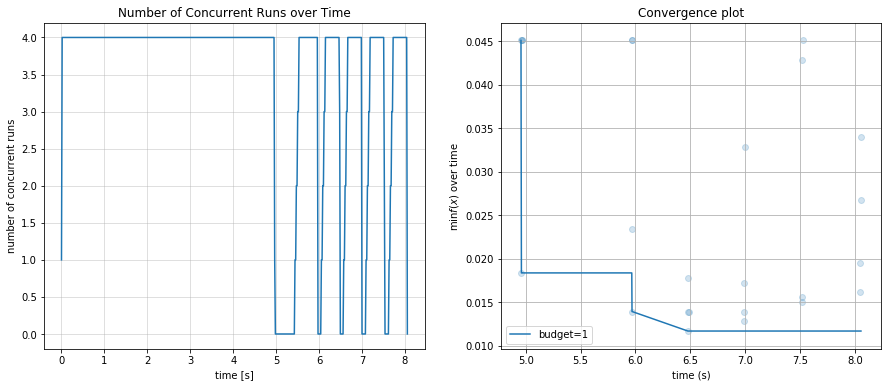

In [17]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplot(1, 2, 1)
result.plot_concurrent_over_time();
plt.subplot(1, 2, 2)
result.plot_convergence_over_time();

## 单机multiprocessing后端

In [18]:
with parallel_backend("multiprocessing"):
    result = fmin(evaluator, config_space, n_jobs=n_jobs, parallel_strategy="MapReduce", n_iterations=40)

100%|██████████| 40/40 [00:09<00:00,  4.43trial/s, best loss: 0.012]


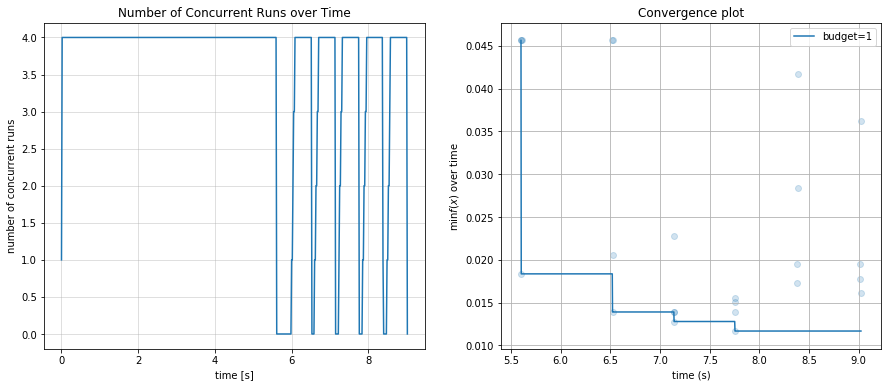

In [19]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplot(1, 2, 1)
result.plot_concurrent_over_time();
plt.subplot(1, 2, 2)
result.plot_convergence_over_time();

## 单机loky后端

In [25]:
with parallel_backend("loky"):
    result = fmin(evaluator, config_space, n_jobs=n_jobs, parallel_strategy="MapReduce", n_iterations=40)

100%|██████████| 40/40 [00:07<00:00,  5.18trial/s, best loss: 0.012]


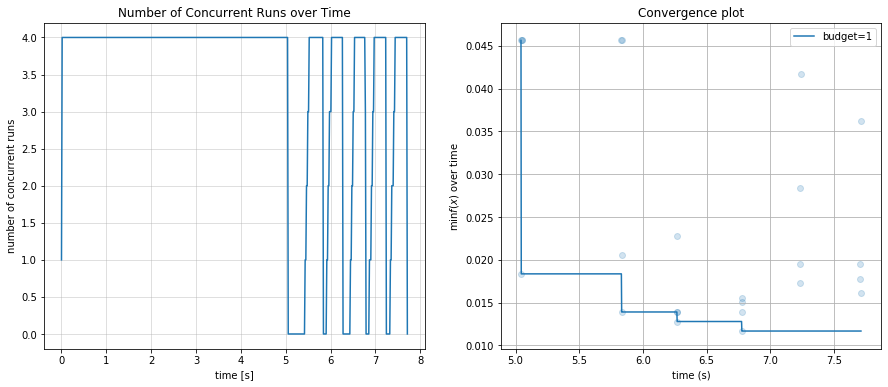

In [26]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplot(1, 2, 1)
result.plot_concurrent_over_time();
plt.subplot(1, 2, 2)
result.plot_convergence_over_time();

## 集群pyspark后端